Zenith dependence of neutrino fluxes
--------------------------------------

This notebook demonstrates how to compute the zenith distribution for neutrinos at fixed energy.


In [1]:
#basic imports and jupyter setup
#import primary model choices
import crflux.models as pm
import matplotlib.pyplot as plt
import numpy as np

#import solver related modules
from MCEq.core import MCEqRun

In the present case, we choose the `MSIS00_IC` density model. The origin of the coordinate system is centered at the South Pole. The zenith angle can vary between $0^\circ$ (vertical) and $180^\circ$ (vertical up-going from North Pole).

In [4]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3c',
#primary cosmic ray flux model
#support a tuple (primary model class (not instance!), arguments)
primary_model = (pm.HillasGaisser2012, "H3a"),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0,
#density model
density_model=('MSIS00_IC',('SouthPole','January')),
)

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


Define variables and angles
-------------------------

In [5]:
#Power of energy to scale the flux
mag = 3

#obtain energy grid (fixed) of the solution for the x-axis of the plots
e_grid = mceq_run.e_grid

#Dictionary for results
flux = {}

#Define equidistant grid in cos(theta)

cos_theta = np.linspace(-1,1,37)
angles = np.arccos(cos_theta)/np.pi*180.

Compute spectrum for each zenith angle and two seasons
---------------------------------------------------------

For each zenith angle compute the whole spectrum. When plotting pick just one energy bin to plot the zenith distribution for leptons of fixed energy.

In [6]:
flux_summer = {}
flux_winter = {}

for flux, atm_tup in [(flux_summer,('MSIS00_IC', ('SouthPole', 'January'))),
                      (flux_winter,('MSIS00_IC', ('SouthPole', 'July')))]:
    mceq_run.set_density_model(atm_tup)
    #Initialize empty grid
    for frac in ['mu_conv','mu_pr','mu_total','mu_pi','mu_k',
                 'numu_conv','numu_pr','numu_total','numu_pi','numu_k',
                 'nue_conv','nue_pr','nue_total', 'nue_pi','nue_k',
                 'nutau_pr']:
        flux[frac] = []


    #Sum fluxes, calculated for different angles
    for theta in angles:
        mceq_run.set_theta_deg(theta)
        mceq_run.solve()
        #_conv means conventional (mostly pions and kaons)
        flux['mu_conv'].append(mceq_run.get_solution('conv_mu+', mag)
                           + mceq_run.get_solution('conv_mu-', mag))

        # _pr means prompt (the mother of the muon had a critical energy
        # higher than a D meson. Includes all charm and direct resonance
        # contribution)
        flux['mu_pr'].append(mceq_run.get_solution('pr_mu+', mag)
                         + mceq_run.get_solution('pr_mu-', mag))

        # total means conventional + prompt
        flux['mu_total'].append(mceq_run.get_solution('total_mu+', mag)
                            + mceq_run.get_solution('total_mu-', mag))
        # originating from pion or kaon decays
        flux['mu_pi'].append(mceq_run.get_solution('pi_mu+', mag)
                            + mceq_run.get_solution('pi_mu-', mag))
        flux['mu_k'].append(mceq_run.get_solution('k_mu+', mag)
                            + mceq_run.get_solution('k_mu-', mag))

        # same meaning of prefixes for muon neutrinos as for muons
        flux['numu_conv'].append(mceq_run.get_solution('conv_numu', mag)
                             + mceq_run.get_solution('conv_antinumu', mag))
        flux['numu_pr'].append(mceq_run.get_solution('pr_numu', mag)
                           + mceq_run.get_solution('pr_antinumu', mag))
        flux['numu_total'].append(mceq_run.get_solution('total_numu', mag)
                              + mceq_run.get_solution('total_antinumu', mag))
        flux['numu_pi'].append(mceq_run.get_solution('pi_numu', mag)
                              + mceq_run.get_solution('pi_antinumu', mag))
        flux['numu_k'].append(mceq_run.get_solution('k_numu', mag)
                              + mceq_run.get_solution('k_antinumu', mag))

        # same meaning of prefixes for electron neutrinos as for muons
        flux['nue_conv'].append(mceq_run.get_solution('conv_nue', mag)
                            + mceq_run.get_solution('conv_antinue', mag))

        flux['nue_pr'].append(mceq_run.get_solution('pr_nue', mag)
                          + mceq_run.get_solution('pr_antinue', mag))

        flux['nue_total'].append(mceq_run.get_solution('total_nue', mag)
                             + mceq_run.get_solution('total_antinue', mag))
        flux['nue_pi'].append(mceq_run.get_solution('pi_nue', mag)
                              + mceq_run.get_solution('pi_antinue', mag))
        flux['nue_k'].append(mceq_run.get_solution('k_nue', mag)
                              + mceq_run.get_solution('k_antinue', mag))

        # since there are no conventional tau neutrinos, prompt=total
        flux['nutau_pr'].append(mceq_run.get_solution('total_nutau', mag)
                            + mceq_run.get_solution('total_antinutau', mag))

MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MSIS00IceCubeCentered::set_theta(): latitude = 90.00 for zenith angle = 180.00
MSIS00IceCubeCentered::set_theta(): theta = 180.00 below horizon. using theta =  0.00
MSIS00IceCubeCentered::set_theta(): latitude = 51.63 for zenith angle = 160.81
MSIS00IceCubeCentered::set_theta(): theta = 160.81 below horizon. using theta = 19.19
MSIS00IceCubeCentered::set_theta(): latitude = 35.48 for zenith angle = 152.73
MSIS00IceCubeCentered::set_theta(): theta = 152.73 below horizon. using theta = 27.27
MSIS00IceCubeCentered::set_theta(): latitude = 22.90 for zenith angle = 146.44
MSIS00IceCubeCentered::set_theta(): theta = 146.44 below horizon. using theta = 33.56
MSIS00IceCubeCentered::set_theta(): latitude = 12.13 for zenith angle = 141.06
MSIS00IceCubeCentered::set_theta(): theta = 141.06 below horizon. using theta = 38.94
MSIS

In [7]:
# Plot seasons?
seasons = True

Plot **muon neutrinos** from down- to up-going zenith (averaged over azimuth). Solid=summer, dashed=winter.

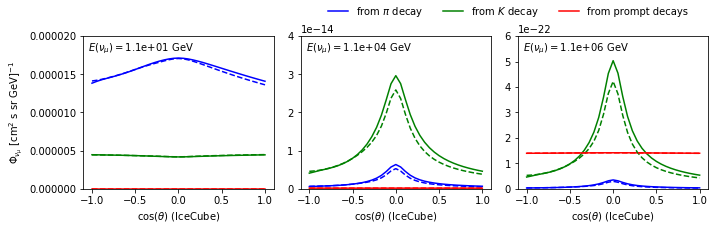

In [10]:
closest_MCEq_energy_idx = lambda e: np.argmin(np.abs(e-mceq_run.e_grid))

idx0 = closest_MCEq_energy_idx(10.) + 1# 10 GeV
idx1 = closest_MCEq_energy_idx(10e3) + 1# 10 TeV
idx2 = closest_MCEq_energy_idx(1e6) + 1 # 1 PeV

ylim = [2e-5, 4e-14, 6e-22]

fig, axes = plt.subplots(1,3,sharex=True,figsize=(9.8,3.))
for i, idx in enumerate([idx0, idx1, idx2]):
    ax = axes[i]
    ax.text(0.01,0.9,rf' $E(\nu_\mu)=${e_grid[idx]:2.1e} GeV',
           transform=ax.transAxes)
    for sid, flux in enumerate([flux_summer, flux_winter]):
        if not seasons and sid > 0: continue
        pi_numu = [fl[idx]/e_grid[idx]**mag for fl, fln 
                     in zip(flux['numu_pi'],flux['numu_total'])]
        k_numu = [fl[idx]/e_grid[idx]**mag for fl, fln 
                     in zip(flux['numu_k'],flux['numu_total'])]
        pr_numu = [fl[idx]/e_grid[idx]**mag for fl, fln 
                     in zip(flux['numu_pr'],flux['numu_total'])]
        ax.plot(cos_theta,pi_numu,
                 label=(r'from $\pi$ decay' if (i==0 and sid==0) else '_nolabel_'),
                 ls='-' if sid==0 else '--',lw=1.5, color='b')
        ax.plot(cos_theta,k_numu,
                 label=('from $K$ decay' if (i==0 and sid==0) else '_nolabel_'),
                 ls='-' if sid==0 else '--',lw=1.5, color='g')
        ax.plot(cos_theta,pr_numu,label=('from prompt decays' 
                 if (i==0 and sid==0) else '_nolabel_'),
                 ls='-' if sid==0 else '--',lw=1.5, color='r')

        ax.set_ylim(0,ylim[i])
        ax.set_xlabel(r'$\cos(\theta)$ (IceCube)')
        
axes[0].set_ylabel(r"$\Phi_{\nu_\mu}$ [cm$^{2}$ s sr GeV]$^{-1}$")

plt.figlegend(*axes[0].get_legend_handles_labels(), loc=(0.45,0.9), ncol=3, frameon=False)

plt.tight_layout(rect=[0.0,0.0,1.,.92], pad=0.05)

# Uncomment to save plot
# plt.savefig('zenith_distribution_numu.png', dpi=300)


Plot **muons** from down-going to horizontal zenith (averaged over azimuth)

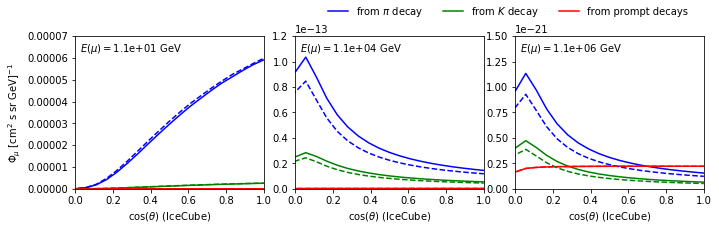

In [12]:
ylim = [7e-5, 12e-14, 15e-22]

fig, axes = plt.subplots(1,3,sharex=True,figsize=(9.8,3.))
for i, idx in enumerate([idx0, idx1, idx2]):
    ax = axes[i]
    ax.text(0.01,0.9,rf' $E(\mu)=${e_grid[idx]:2.1e} GeV',
           transform=ax.transAxes)
    for sid, flux in enumerate([flux_summer, flux_winter]):
        if not seasons and sid > 0: continue
            
        pi_mu = [fl[idx]/e_grid[idx]**mag for fl, fln 
                     in zip(flux['mu_pi'],flux['mu_total'])]
        k_mu = [fl[idx]/e_grid[idx]**mag for fl, fln 
                     in zip(flux['mu_k'],flux['mu_total'])]
        pr_mu = [fl[idx]/e_grid[idx]**mag for fl, fln 
                     in zip(flux['mu_pr'],flux['mu_total'])]
        ax.plot(cos_theta,pi_mu,
                 label=(r'from $\pi$ decay' if (i==0 and sid==0) else '_nolabel_'),
                 ls='-' if sid==0 else '--',lw=1.5, color='b')
        ax.plot(cos_theta,k_mu,
                 label=('from $K$ decay' if (i==0 and sid==0) else '_nolabel_'),
                 ls='-' if sid==0 else '--',lw=1.5, color='g')
        ax.plot(cos_theta,pr_mu,label=('from prompt decays' 
                 if (i==0 and sid==0) else '_nolabel_'),
                 ls='-' if sid==0 else '--',lw=1.5, color='r')

        ax.set_ylim(0,ylim[i])
        ax.set_xlabel(r'$\cos(\theta)$ (IceCube)')
        
axes[0].set_ylabel(r"$\Phi_{\mu}$ [cm$^{2}$ s sr GeV]$^{-1}$")
axes[0].set_xlim(0, 1)
plt.figlegend(*axes[0].get_legend_handles_labels(), loc=(0.45,0.9), ncol=3, frameon=False)

plt.tight_layout(rect=[0.0,0.0,1.,.92], pad=0.05)

# Uncomment to save plot
# plt.savefig('zenith_distribution_muons.png', dpi=300)
